# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Необходимо научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования** — Провести исследовательский анализ данных по объявлениям о продаже квартир.

**Ход исследования**

Данные получены из файла `real_estate_data.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 
 
Исследование пройдёт в 5 этапов:
 1. Обзор данных.
 2. Предобработка данных.
 3. Расчет и доваление результатов в таблицу.
 4. Исследовательский анализ данных.
 5. Вывод.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import nan
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep = '\t')

In [3]:
display(data.info())
display(data.describe().T)
display(data)
display(data.sample(5 , random_state = 42))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

None

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7944,14,2990000.0,35.0,2019-03-29T00:00:00,1,NaN,17.0,16.0,10,NaN,...,9.0,NaN,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7539,8,3790000.0,33.0,2018-12-18T00:00:00,1,2.50,7.0,18.0,2,NaN,...,5.6,NaN,Санкт-Петербург,27455.0,8621.0,1.0,217.0,0.0,NaN,90.0
9889,1,12990000.0,191.0,2017-08-31T00:00:00,7,3.30,5.0,136.1,2,NaN,...,16.0,0.0,Санкт-Петербург,26856.0,5704.0,0.0,NaN,1.0,1017.0,77.0
649,1,7210000.0,61.5,2018-10-02T00:00:00,3,2.92,5.0,43.2,4,NaN,...,5.7,1.0,Санкт-Петербург,25407.0,3982.0,1.0,483.0,0.0,NaN,89.0
13768,10,550000.0,36.0,2017-08-22T00:00:00,1,NaN,2.0,20.0,1,NaN,...,8.0,0.0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,92.0


In [4]:
print(data['rooms'].unique())

[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]


### Вывод

- В качестве разделителя в файле 'real_estate_data.csv' используется знак табуляции '\t'.
- last_price - минимум 12.000, максимум 763.000.000 - слишком маленькое и слишком большое значения среднее сильно отличается от медианы, возможны выбросы.
- rooms - имеется значение 0 возможно неккоректно.
- ceiling_height - имеется большое количество пропусков, миниум 1 - возможно выброс, максимум 100 - явно выброс.
- floors_total, kitchen_area, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition - имеется небольшое количество пропусков.
- living_area, balcony - имеются пропуски.
- is_apartment - тип данных object, вместо bool, большая часть пропуски.


---


15 из 22 столбцов имеют пропуски, как следствие часто int столбцы имеют тип float

## Предобработка данных

In [5]:
print(len(data) - len(data.drop_duplicates()))# проверяем количество явных дубликатов

0


**first_day_exposition** - 23699 non-null object

In [6]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

**ceiling_height** - 14504 non-null float64


ceiling_height:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


Ниже 2.5м: 73
Выше 6м  : 29


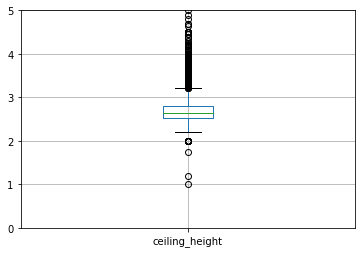

In [7]:
print('\nceiling_height:')
plt.ylim(0, 5)
display(data.boxplot('ceiling_height'))
display(data[data['ceiling_height']>40])
print('Ниже 2.5м:',len(data[data['ceiling_height']< 2.5]))
print('Выше 6м  :',len(data[data['ceiling_height']> 6]))

(0, 15)

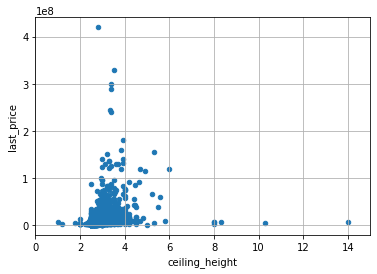

In [8]:
data.plot(x='ceiling_height', y='last_price', kind='scatter',grid=True)
plt.xlim(0,15)

| 2.52 - 25%|	2.65 - 50%|	2.8 - 75% |
=> "ус" = (2.8-2.52)*1.5 = 0.42


Несмотря на "размах усов" жилое помещение должно иметь высоту потолков не менее 2.5 метров положим минимальное значение для выбросов таким.
Максимальное же значение возьмем до 6, остальное как выбросы перепишем в NaN, высота потолков фактор влияющий на цену помещения соответсвенно заполнять его типовыми значениями будет не корректно. 

В целом конструктивно задуманные потолки максимально бывают чуть более 4 метров, на граффике как раз видно что отсечка на 5ти отрезает все кучные скопления точек, но предположим что в отрезке от 5 до 6 лежат нестандартные квартиры захватывающие чердаки.

In [9]:
for value in range(len(data)):
    if ((data['ceiling_height'][value] >=1) & (data['ceiling_height'][value]<2.5)) | ((data['ceiling_height'][value] >6) & (data['ceiling_height'][value]<=100)):
        data['ceiling_height'][value] = nan

In [10]:
display(data['ceiling_height'].describe())

count    14402.000000
mean         2.728619
std          0.277920
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

**floors_total** - 23613 non-null float64
заполнить пропуски нельзя

**living_area** - 21796 non-null float64

В столбце с общей площадью пропусков нет, посчитаем какой в среднем процент занимает жилая площадь от общей и заполним пропуски.

In [11]:
mean_proportion_living_area = data[data['living_area'].isna() == False]
mean_proportion_living_area = (mean_proportion_living_area['living_area']/mean_proportion_living_area['total_area']).mean()
print('\nДоля жилой площади в среднем:', mean_proportion_living_area,'\n')
data['living_area'] = data['living_area'].fillna(0)
for value in range(len(data)):
    if data['living_area'][value] == 0:
        data['living_area'][value] = mean_proportion_living_area * data['total_area'][value]
print(data['living_area'].describe())


Доля жилой площади в среднем: 0.5647655216993234 

count    23699.000000
mean        34.562480
std         22.326965
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64


**is_apartment** - 2775 non-null object

Если не указали, значит не апартаменты. Тип явно булев.

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(False)
display(data[(data['is_apartment'].isna() == True)])
display(data[(data['is_apartment'] == True)])
data['is_apartment'] = data['is_apartment'].astype('bool')
display(data.info())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
543,11,12790000.0,56.60,2018-11-06,2,3.50,3.0,29.400000,1,True,...,NaN,NaN,Петергоф,35248.0,30437.0,3.0,53.0,3.0,22.0,NaN
916,11,8183000.0,70.00,2018-01-11,2,3.12,3.0,40.000000,3,True,...,NaN,2.0,Санкт-Петербург,45796.0,21729.0,0.0,NaN,1.0,754.0,179.0
1109,1,34878556.0,95.80,2014-12-09,2,NaN,6.0,58.300000,5,True,...,20.00,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572.0
1608,12,2150000.0,20.10,2019-01-30,1,NaN,9.0,11.351787,1,True,...,NaN,NaN,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13.0
2759,11,7500000.0,152.00,2018-07-27,3,3.00,3.0,85.844359,1,True,...,NaN,1.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,7.0
2975,9,4931398.0,42.90,2018-07-23,1,3.15,4.0,20.390000,3,True,...,10.29,NaN,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,273.0
3067,13,6600000.0,95.00,2018-09-08,2,4.50,7.0,45.000000,7,True,...,25.00,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,96.0
3816,4,4779000.0,53.10,2016-05-16,1,NaN,13.0,19.800000,6,True,...,15.90,2.0,Санкт-Петербург,19396.0,4516.0,0.0,NaN,1.0,826.0,60.0
3951,10,4300000.0,50.00,2019-04-20,1,3.00,11.0,17.000000,9,True,...,12.00,2.0,Санкт-Петербург,10143.0,11367.0,0.0,NaN,0.0,NaN,NaN
4339,19,6900000.0,72.00,2019-03-25,3,3.50,4.0,70.000000,1,True,...,NaN,NaN,Санкт-Петербург,31487.0,4466.0,2.0,353.0,1.0,439.0,22.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14402 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_ar

None

**kitchen_area** - 21421 non-null float64

Тоже самое как с жилой площадью, посчитаем долю прикинем приблизительно площадь, заполним пропуски.

In [13]:
mean_proportion_kitchen_area = data[data['kitchen_area'].isna() == False]
mean_proportion_kitchen_area = (mean_proportion_kitchen_area['kitchen_area']/mean_proportion_kitchen_area['total_area']).mean()
print('\nДоля площади кухни в среднем:', mean_proportion_kitchen_area,'\n')
data['kitchen_area'] = data['kitchen_area'].fillna(0)
for value in range(len(data)):
    if data['kitchen_area'][value] == 0:
        data['kitchen_area'][value] = mean_proportion_kitchen_area * data['total_area'][value]
print(data['kitchen_area'].describe())


Доля площади кухни в среднем: 0.18735473877174058 

count    23699.000000
mean        10.572683
std          6.095394
min          1.300000
25%          7.000000
50%          9.080000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


**balcony** - 12180 non-null float64

Нет данных о балконах - значит их нету, заменяем на 0, и меняем тип на int.

In [14]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int8')
display(data['balcony'].describe())

count    23699.000000
mean         0.591080
std          0.959298
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

**locality_name** - 23650 non-null object

In [15]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок')
data['locality_name'] = data['locality_name'].str.replace('посёлок ', '')
data['locality_name'] = data['locality_name'].str.replace('городского типа ', '')
data['locality_name'] = data['locality_name'].str.replace('городской ', '')
data['locality_name'] = data['locality_name'].str.replace('деревня ', '')
data['locality_name'] = data['locality_name'].str.replace('село ', '')
data['locality_name'] = data['locality_name'].str.replace('коттеджный ', '')
print(len(data['locality_name'].unique()))
data['locality_name'] = data['locality_name'].fillna('данные_отсутствуют')
print(data['locality_name'].unique())

311
['санкт-петербург' 'шушары' 'янино-1' 'парголово' 'мурино' 'ломоносов'
 'сертолово' 'петергоф' 'пушкин' 'кудрово' 'коммунар' 'колпино'
 'красный бор' 'гатчина' 'фёдоровское' 'выборг' 'кронштадт' 'кировск'
 'новое девяткино' 'металлострой' 'лебяжье' 'сиверский' 'молодцово'
 'кузьмоловский' 'садовое товарищество новая ропша' 'павловск' 'пикколово'
 'всеволожск' 'волхов' 'кингисепп' 'приозерск' 'сестрорецк' 'куттузи'
 'аннино' 'ефимовский' 'плодовое' 'заклинье' 'торковичи' 'первомайское'
 'красное село' 'понтонный' 'сясьстрой' 'старая' 'лесколово' 'новый свет'
 'сланцы' 'путилово' 'ивангород' 'шлиссельбург' 'никольское' 'зеленогорск'
 'сосновый бор' 'оржицы' 'кальтино' 'романовка' 'бугры' 'рощино' 'кириши'
 'луга' 'волосово' 'отрадное' 'павлово' 'оредеж' 'копорье' 'молодёжное'
 'тихвин' 'победа' 'нурма' 'синявино' 'тосно' 'стрельна' 'бокситогорск'
 'александровская' 'лопухинка' 'пикалёво' 'терволово' 'советский'
 'подпорожье' 'петровское' 'токсово' 'сельцо' 'вырица' 'кипень' 'келози'


Дубликаты почищенны, лематизировать на мой взгляд опасно, ибо много составных сложных названий, пропуски заменены на 'данные_отсутствуют'.

In [16]:
display(data[data['rooms']==0])
for value in range(len(data)):
    if (data['rooms'][value] == 0):
        data['rooms'][value] = 1
display(data[data['rooms']==0])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.500000,2,False,...,5.058578,2,мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.000000,1,False,...,4.683868,0,кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.750000,4,False,...,5.079187,2,санкт-петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.300000,19,False,...,6.445003,1,парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,14.119138,7,False,...,4.683868,0,шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25.0,18.000000,16,False,...,4.871223,0,санкт-петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28,0,NaN,24.0,18.000000,4,False,...,5.189726,2,мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19.0,14.683904,8,False,...,4.871223,0,санкт-петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11,0,NaN,9.0,18.000000,8,False,...,5.433287,2,никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


По общей площади видно что это однушки

**airports_nearest** - 18157 non-null float64

Можно было бы заполнить в ручную, прикинув по названию населенного пункта, но это очень долго, оставим как етсь.

---

**cityCenters_nearest** - 18180 non-null float64

Оставим как етсь.

---

**parks_around3000** - 18181 non-null float64

Если нет данных значит и парков нет, заполним нулями.

---

**parks_nearest** - 8079 non-null float64

Оставим как етсь.

---

**ponds_around3000** - 18181 non-null float64

Если нет данных значит и водоемов нет, заполним нулями.

---

**ponds_nearest** - 9110 non-null float64

Оставим как етсь.

---

**days_exposition** - 20518 non-null float64

Заполнить не представляется возможным.

In [17]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

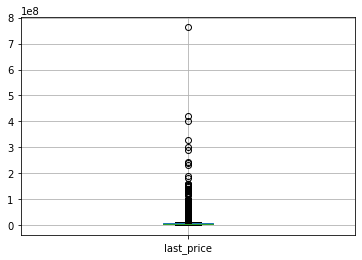

In [18]:
display(data.boxplot('last_price'))

In [19]:
display(data[data['ceiling_height'].isna() == True].groupby('floors_total').count())
data_vr = data[data['ceiling_height'].isna() == False]
display(data.groupby('floors_total')['ceiling_height'].median())
data['ceiling_height'] = data['ceiling_height'].fillna(0)
data.info()
for value in range(len(data)):
    if data['ceiling_height'][value] == 0:
        data['ceiling_height'][value] = data_vr[data_vr['floors_total'] == data['floors_total'][value]]['ceiling_height'].median()

display(data.groupby('floors_total')['ceiling_height'].median())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,living_area,floor,is_apartment,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
floors_total,,,,,,,,,,,,,,,,,,,,,
1.0,17,17,17,17,17,0,17,17,17,17,...,17,17,17,2,2,17,0,17,1,14
2.0,174,174,174,174,174,0,174,174,174,174,...,174,174,174,29,29,174,16,174,14,138
3.0,270,270,270,270,270,0,270,270,270,270,...,270,270,270,130,130,270,77,270,87,235
4.0,414,414,414,414,414,0,414,414,414,414,...,414,414,414,281,281,414,161,414,184,364
5.0,2167,2167,2167,2167,2167,0,2167,2167,2167,2167,...,2167,2167,2167,1264,1265,2167,676,2167,598,1955
6.0,299,299,299,299,299,0,299,299,299,299,...,299,299,299,253,254,299,169,299,162,272
7.0,195,195,195,195,195,0,195,195,195,195,...,195,195,195,167,167,195,101,195,96,173
8.0,172,172,172,172,172,0,172,172,172,172,...,172,172,172,144,144,172,95,172,94,150
9.0,1216,1216,1216,1216,1216,0,1216,1216,1216,1216,...,1216,1216,1216,994,994,1216,390,1216,425,1144


floors_total
1.0     2.90
2.0     2.70
3.0     2.80
4.0     3.00
5.0     2.55
6.0     3.00
7.0     3.00
8.0     2.80
9.0     2.55
10.0    2.60
11.0    2.75
12.0    2.65
13.0    2.70
14.0    2.60
15.0    2.70
16.0    2.70
17.0    2.70
18.0    2.70
19.0    2.75
20.0    2.75
21.0    2.70
22.0    2.75
23.0    2.75
24.0    2.75
25.0    2.75
26.0    2.66
27.0    2.70
28.0    2.60
29.0    2.60
33.0     NaN
34.0    2.65
35.0    2.70
36.0    2.70
37.0     NaN
52.0    2.65
60.0    2.88
Name: ceiling_height, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int8
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           8079 non-null float64
ponds_aroun

floors_total
1.0     2.90
2.0     2.70
3.0     2.80
4.0     3.00
5.0     2.55
6.0     3.00
7.0     3.00
8.0     2.80
9.0     2.55
10.0    2.60
11.0    2.75
12.0    2.65
13.0    2.70
14.0    2.60
15.0    2.70
16.0    2.70
17.0    2.70
18.0    2.70
19.0    2.75
20.0    2.75
21.0    2.70
22.0    2.75
23.0    2.75
24.0    2.75
25.0    2.75
26.0    2.66
27.0    2.70
28.0    2.60
29.0    2.60
33.0     NaN
34.0    2.65
35.0    2.70
36.0    2.70
37.0     NaN
52.0    2.65
60.0    2.88
Name: ceiling_height, dtype: float64

In [20]:
data['ceiling_height'][11575] = 2.7
data['ceiling_height'][397] = 2.7
data['ceiling_height'][5807] = 2.7
data['ceiling_height'][11079] = 2.7
data['ceiling_height'][16934] = 2.7

display(data[data['floors_total'] == 33])
display(data[data['floors_total'] == 36])
display(data[data['floors_total'] == 37])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11575,9,9900000.0,101.0,2016-04-28,3,2.7,33.0,53.0,32,False,...,21.0,0,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5990000.0,54.0,2018-03-22,2,2.7,36.0,21.4,28,False,...,18.7,1,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0
5807,17,8150000.0,80.0,2019-01-09,2,2.7,36.0,41.0,13,False,...,12.0,5,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
11079,16,9200000.0,75.0,2019-02-22,2,2.7,36.0,40.0,29,False,...,12.0,2,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16934,5,4100000.0,40.0,2017-10-17,1,2.7,37.0,17.4,5,False,...,8.34,0,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0


## Расчёты и добавление результатов в таблицу

In [21]:
data['price_per_meter'] = data['last_price']/data['total_area'] #цена за квадрат

data['day_of_week'] = data['first_day_exposition'].dt.dayofweek #день недели когда выложили объявление
data['month'] = data['first_day_exposition'].dt.month #месяц когда выложили объявление
data['year'] = data['first_day_exposition'].dt.year #год когда выложили объявление

data['type_floor'] = '' #тип этажа
for value in range(len(data)):
    if (data['floors_total'][value] - data['floor'][value]) == 0:
        data['type_floor'][value] = 'последний'
    elif data['floor'][value] == 1:
        data['type_floor'][value] = 'первый'
    else:
        data['type_floor'][value] = 'другой'

data['living_to_total_area'] = data['living_area']/data['total_area'] #соотношение жилой и общей площади
data['kitchen_to_total_area'] = data['kitchen_area']/data['total_area'] #отношение площади кухни к общей.

display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_week,month,year,type_floor,living_to_total_area,kitchen_to_total_area
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,2.0,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,2.75,11.0,18.600000,1,False,...,0.0,NaN,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.55,5.0,34.300000,4,False,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,2.60,14.0,89.797718,9,False,...,3.0,234.0,424.0,408176.100629,4,7,2015,другой,0.564766,0.187355
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,...,3.0,381.0,NaN,72490.845228,1,3,2017,другой,0.547792,0.103356
23695,14,3100000.0,59.00,2018-01-15,3,2.55,5.0,38.000000,4,False,...,0.0,NaN,45.0,52542.372881,0,1,2018,другой,0.644068,0.144068
23696,18,2500000.0,56.70,2018-02-11,2,2.80,3.0,29.700000,1,False,...,0.0,NaN,NaN,44091.710758,6,2,2018,первый,0.523810,0.187355
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,43.345754,12,False,...,3.0,196.0,602.0,149511.400651,1,3,2017,другой,0.564766,0.303583


## Исследовательский анализ данных

**Изучение параметров: площадь, цена, число комнат, высота потолков**

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


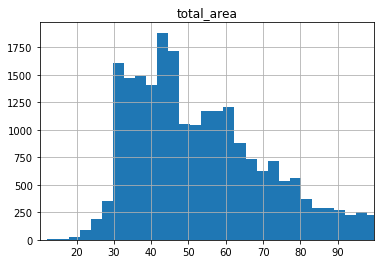

In [22]:
def hs(df, col_name):
    print(df[col_name].describe())
    us_low = df[col_name].describe()[4] - (df[col_name].describe()[6]-df[col_name].describe()[4])
    us_high = df[col_name].describe()[6] + (df[col_name].describe()[6]-df[col_name].describe()[4])
    df.hist(col_name, bins = 300)
    plt.xlim(us_low,us_high)

hs(data,'total_area')

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


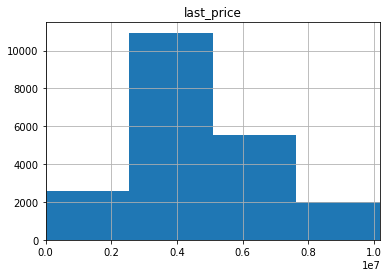

In [23]:
#data.hist('last_price',bins = 1500) #общая цена
#plt.xlim(0,49999999)
#data['last_price'].describe()
hs(data,'last_price')

count    2.369900e+04
mean     9.942166e+04
std      5.030680e+04
min      1.118349e+02
25%      7.658547e+04
50%      9.500000e+04
75%      1.142563e+05
max      1.907500e+06
Name: price_per_meter, dtype: float64


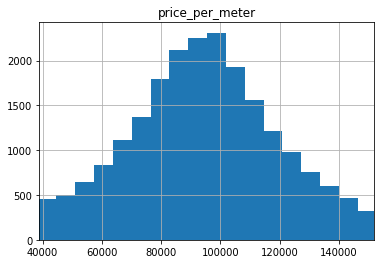

In [24]:
#data.hist('price_per_meter',bins = 200) #цена за метр
#data['price_per_meter'].describe()
hs(data,'price_per_meter')

count    23699.000000
mean         2.078948
std          1.066196
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


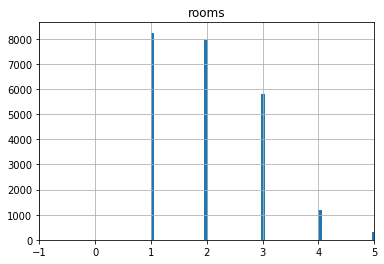

In [25]:
#data.hist('rooms', bins = 30) #число комнат
#display(data['rooms'].describe())
hs(data,'rooms')

count    23622.000000
mean         2.708764
std          0.234324
min          2.500000
25%          2.550000
50%          2.650000
75%          2.750000
max          6.000000
Name: ceiling_height, dtype: float64


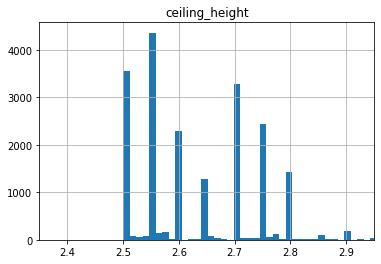

In [26]:
#data.hist('ceiling_height', bins = 100) #высота потолков
#data['ceiling_height'].describe()
hs(data,'ceiling_height')

Распределение всех параметров похоже на пуассона.

**Изучение времени продажи квартиры.**

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


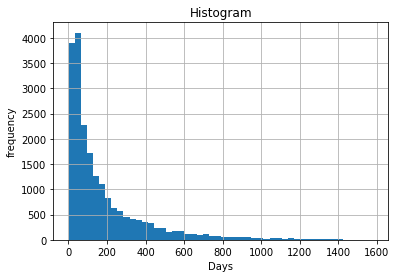

In [27]:
data.hist('days_exposition', bins = 50) #время продажи квартиры
plt.title('Histogram')
plt.xlabel('Days')
plt.ylabel('frequency')
print(data['days_exposition'].describe()) # (232-45)*1.5=447.5 - длинна уса

In [28]:
data[data['days_exposition']<448]['days_exposition'].describe()

count    18376.000000
mean       119.744232
std        109.116699
min          1.000000
25%         40.000000
50%         81.000000
75%        173.000000
max        447.000000
Name: days_exposition, dtype: float64

Продажа занимает в среднем около трех месяцев. Быстрая продажа - менее 40 дней. Долгая продажа - более 6 месяцев.

**редкие и выбивающиеся значения**

In [29]:
def us(df,col_name):
    us_low = df[col_name].describe()[4] - 1.5*(df[col_name].describe()[6]-df[col_name].describe()[4])
    us_high = df[col_name].describe()[6] + 1.5*(df[col_name].describe()[6]-df[col_name].describe()[4])
    return us_low,us_high
print(us(data,'last_price'))
display(data['last_price'].describe())

(0.0, 10200000.0)


count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Отсечем цены находящиеся за 'усами'

In [30]:
data = data[(data['last_price'] > us(data,'last_price')[0])&(data['last_price'] < us(data,'last_price')[1])]
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,21010.0,9.631794e+00,5.507729e+00,0.000000,6.000000e+00,9.000000e+00,1.300000e+01,3.900000e+01
last_price,21010.0,4.657343e+06,1.976841e+06,12190.000000,3.300000e+06,4.350000e+06,5.800000e+06,1.019800e+07
total_area,21010.0,5.215840e+01,1.784772e+01,12.000000,3.870000e+01,4.810000e+01,6.200000e+01,2.015000e+02
rooms,21010.0,1.910947e+00,8.803519e-01,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,7.000000e+00
ceiling_height,20944.0,2.676791e+00,1.930418e-01,2.500000,2.550000e+00,2.640000e+00,2.750000e+00,5.800000e+00
floors_total,20939.0,1.073241e+01,6.624004e+00,1.000000,5.000000e+00,9.000000e+00,1.600000e+01,6.000000e+01
living_area,21010.0,2.987247e+01,1.264423e+01,2.000000,1.820000e+01,2.890000e+01,3.800000e+01,1.138003e+02
floor,21010.0,5.866730e+00,4.901140e+00,1.000000,2.000000e+00,4.000000e+00,8.000000e+00,3.300000e+01
kitchen_area,21010.0,9.395789e+00,3.644362e+00,1.300000,7.000000e+00,8.800000e+00,1.100000e+01,6.400000e+01
balcony,21010.0,5.873870e-01,9.296768e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00


In [31]:
data = data.reset_index(drop=True)

**Факторы стоимости квартиры**

In [32]:
print('\nКоэффициенты корреляции общей цены:')
print('\nОтносительно площади:              ',data['last_price'].corr(data['total_area']))
print('\nОтносительно числа комнат:         ',data['last_price'].corr(data['rooms']))
print('\nОтносительно расстояния до центра:',data['last_price'].corr(data['cityCenters_nearest']))


Коэффициенты корреляции общей цены:

Относительно площади:               0.6616265702551204

Относительно числа комнат:          0.4290754270491832

Относительно расстояния до центра: -0.3313141355074317


Text(0, 0.5, 'Расстояния до центра')

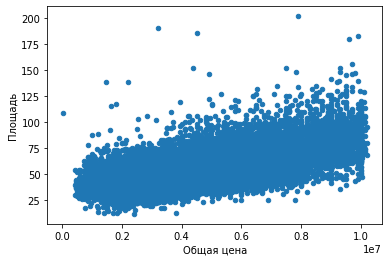

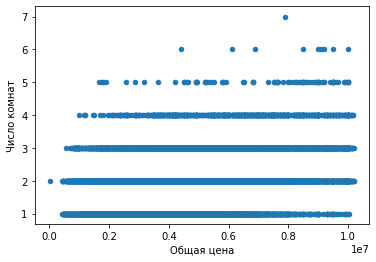

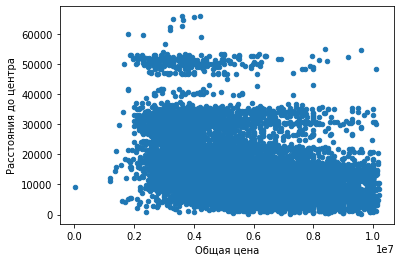

In [33]:
data.plot(x='last_price', y='total_area', kind='scatter')
plt.xlabel('Общая цена')
plt.ylabel('Площадь')

data.plot(x='last_price', y='rooms', kind='scatter')
plt.xlabel('Общая цена')
plt.ylabel('Число комнат')

data.plot(x='last_price', y='cityCenters_nearest', kind='scatter')
plt.xlabel('Общая цена')
plt.ylabel('Расстояния до центра')

In [34]:
print('\nКоэффициенты корреляции цены за квадрат:')
print('\nОтносительно площади:              ',data['price_per_meter'].corr(data['total_area']))
print('\nОтносительно числа комнат:         ',data['price_per_meter'].corr(data['rooms']))
print('\nОтносительно расстояния до центра:',data['price_per_meter'].corr(data['cityCenters_nearest']))


Коэффициенты корреляции цены за квадрат:

Относительно площади:               -0.15511019686615457

Относительно числа комнат:          -0.26983961915699395

Относительно расстояния до центра: -0.3859071239338858


Text(0, 0.5, 'Расстояния до центра')

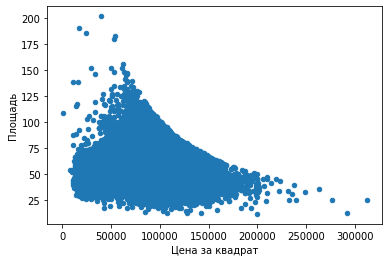

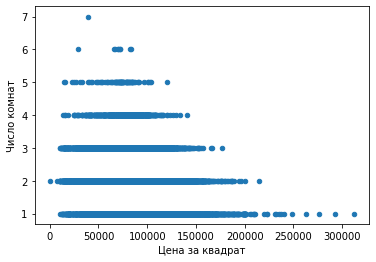

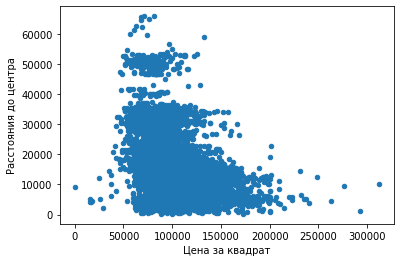

In [35]:
data.plot(x='price_per_meter', y='total_area', kind='scatter')
plt.xlabel('Цена за квадрат')
plt.ylabel('Площадь')

data.plot(x='price_per_meter', y='rooms', kind='scatter')
plt.xlabel('Цена за квадрат')
plt.ylabel('Число комнат')

data.plot(x='price_per_meter', y='cityCenters_nearest', kind='scatter')
plt.xlabel('Цена за квадрат')
plt.ylabel('Расстояния до центра')

В целом тенденции цены за квадрат и общей одинаковые, но в значениях сильно отличаются:

Относительно площади общая цена имеет сильную корреляцию, в то время как цена за квадратный метр слабую(больше площадь - больше цена)

Относительно числа комнат общая цена имеет слабую корреляцию, в то время как цена за квадратный метр корреляции не имеет(больше комнат - больше цена)

Относительно расстояния до центра общая цена, как и цена за квадратный метр имеет слабую корреляцию(за квадрат на 20% побольше),(дальше от центра - меньше цена)

(1, 15000000)

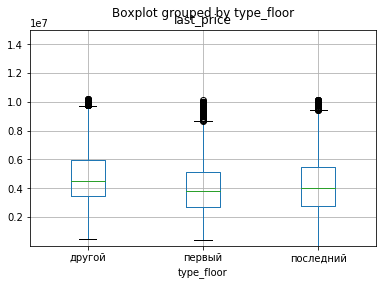

In [36]:
data.boxplot(column = 'last_price', by = 'type_floor')
plt.ylim(1,15000000)

(1, 300000)

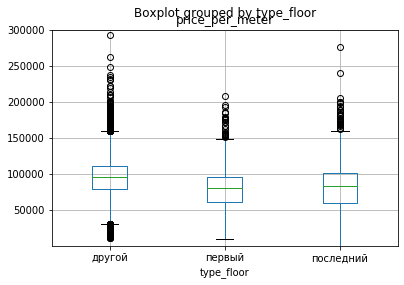

In [37]:
data.boxplot(column = 'price_per_meter', by = 'type_floor')
plt.ylim(1,300000)

Самые дешевые квартиры на первом и последнем этажах(на последнем подороже).

(3200000, 7000000)

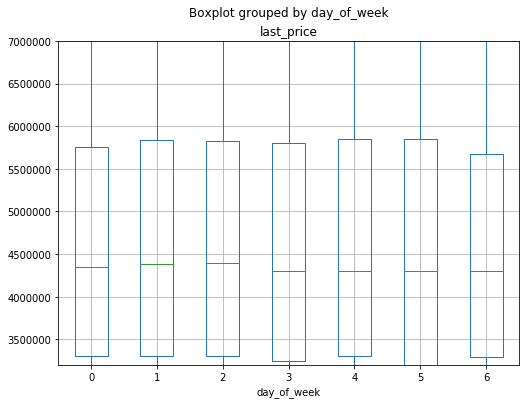

In [38]:
data.boxplot(column = 'last_price', by = 'day_of_week', figsize=(8, 6))
plt.ylim(3200000,7000000)

(70000, 120000)

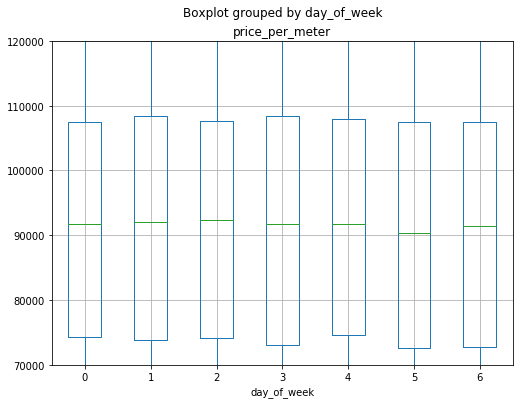

In [39]:
data.boxplot(column = 'price_per_meter', by = 'day_of_week', figsize=(8, 6))
plt.ylim(70000,120000)

Квартиры размещенные во вторник и среду, имеют цены выше чем размещенные на выходных(но совсем немного).

(3200000, 7000000)

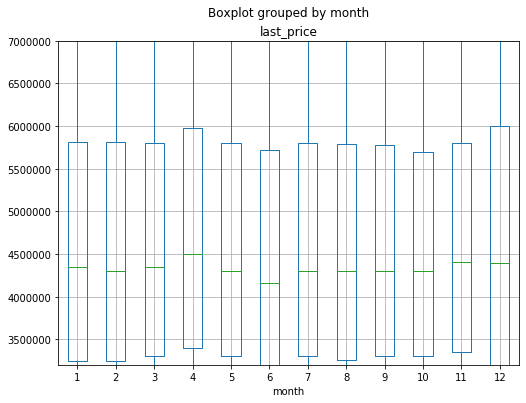

In [40]:
data.boxplot(column = 'last_price', by = 'month', figsize=(8, 6))
plt.ylim(3200000,7000000)

(70000, 120000)

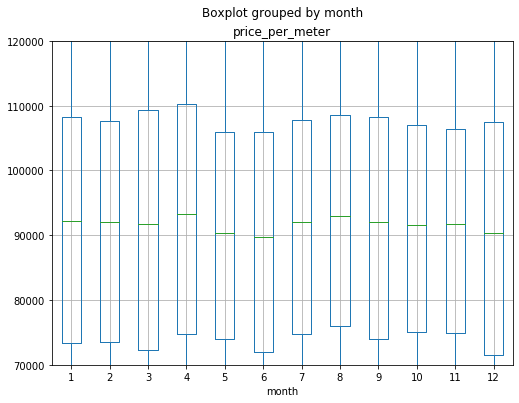

In [41]:
data.boxplot(column = 'price_per_meter', by = 'month', figsize=(8, 6))
plt.ylim(70000,120000)

можно заметить незначительное проседание цен квартир размещенных в май, июнь и октябрь

(3200000, 15000000)

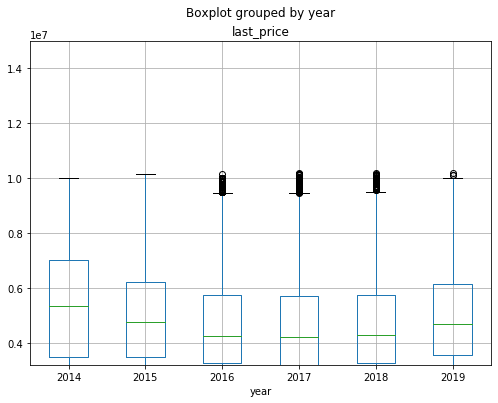

In [42]:
data.boxplot(column = 'last_price', by = 'year', figsize=(8, 6))
plt.ylim(3200000,15000000)

(70000, 150000)

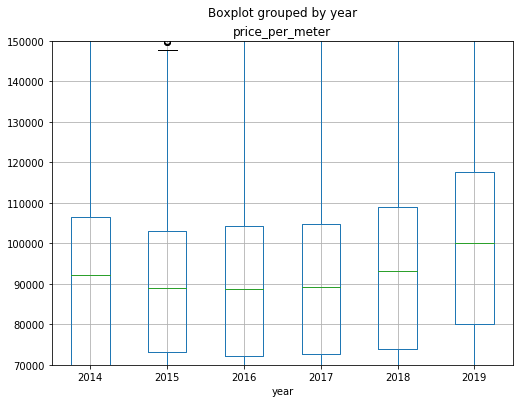

In [43]:
data.boxplot(column = 'price_per_meter', by = 'year', figsize=(8, 6))
plt.ylim(70000,150000)

Квартиры дешевели к 2017 году, после чего стали дорожать.

---
**вывод**

Больше всего на стоимость квартиры влияют удаленность от центра и площадь, также в ценообразовании присутствует сезонность(в зависимости месяца размещения меняется цена). И сильно влияет год продажи, жилье к 16-17 году сильно подешевело(~20-25%), и немного подорожало к 19

---

**10 населённых пунктов с наибольшим числом объявлений**

In [44]:
display(data.groupby('locality_name')['total_images'].count().sort_values(ascending=False).head(10))

locality_name
санкт-петербург    13137
мурино               590
кудрово              468
шушары               438
всеволожск           394
колпино              336
пушкин               332
парголово            327
гатчина              305
выборг               236
Name: total_images, dtype: int64

In [45]:
localitys = ['санкт-петербург', 'мурино', 'кудрово', 'шушары', 'всеволожск',
             'пушкин', 'колпино', 'парголово', 'гатчина', 'выборг']

df_localitys = pd.DataFrame({'localitys_name': localitys,})
df_localitys['price_per_meter'] = 0
for value in range(len(df_localitys)):
    df_localitys['price_per_meter'][value] = data[data['locality_name'] == df_localitys['localitys_name'][value]]['price_per_meter'].mean()

display(df_localitys)

,localitys_name,price_per_meter
0,санкт-петербург,104391
1,мурино,86087
2,кудрово,95053
3,шушары,78623
4,всеволожск,66819
5,пушкин,100001
6,колпино,75185
7,парголово,90175
8,гатчина,68421
9,выборг,57932


Text(0.5, 0, 'Местоположение')

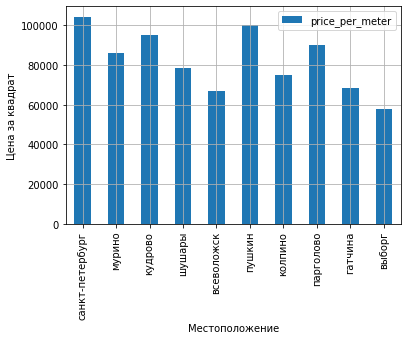

In [46]:
df_localitys.plot(x = 'localitys_name', y = 'price_per_meter', kind = 'bar', grid = True)
plt.ylabel('Цена за квадрат')
plt.xlabel('Местоположение')

Самая высокая стоимость жилья - санкт-петербург.

Самая низкая стоимость жилья - выборг.

**Предложения квартир**

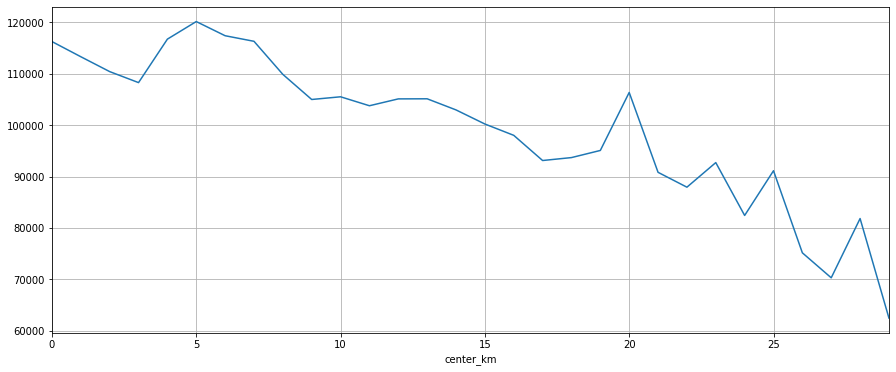

In [47]:
data['center_km'] = data['cityCenters_nearest'] // 1000 
spb_centre = data[data['locality_name'] == 'санкт-петербург']
spb_centre_mean = spb_centre.groupby('center_km')['price_per_meter'].mean()
spb_centre_mean.plot(figsize=(15,6), grid=True)

Граница центральной зоны 8-10 км

**Сегмент квартир в центре**

In [48]:
spb_centre = spb_centre[spb_centre['center_km']<=9]

count    3252.000000
mean       59.141415
std        21.141531
min        12.000000
25%        43.400000
50%        56.000000
75%        72.000000
max       190.000000
Name: total_area, dtype: float64

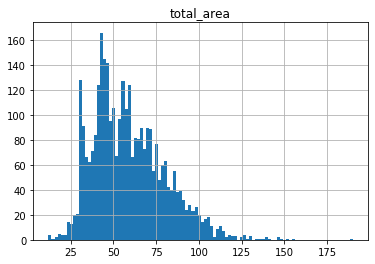

In [49]:
spb_centre.hist('total_area', bins = 100) #площадь
spb_centre['total_area'].describe()

Квартиры в центре имеют ~25% большую площадь

count    3.252000e+03
mean     6.401965e+06
std      1.955860e+06
min      1.219000e+04
25%      4.800000e+06
50%      6.392400e+06
75%      8.000000e+06
max      1.019800e+07
Name: last_price, dtype: float64

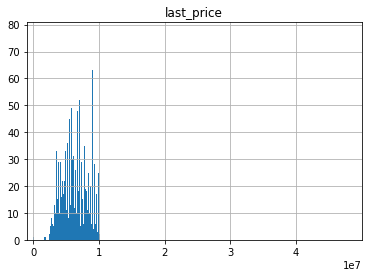

In [50]:
spb_centre.hist('last_price',bins = 200) #общая цена
plt.xlim(-1000000,49999999)
spb_centre['last_price'].describe()

Медианное и среднее значение общей цены в центре больше на ~43%

count      3252.000000
mean     112688.699498
std       27272.806997
min         111.834862
25%       93539.668701
50%      108108.108108
75%      128751.341202
max      292307.692308
Name: price_per_meter, dtype: float64

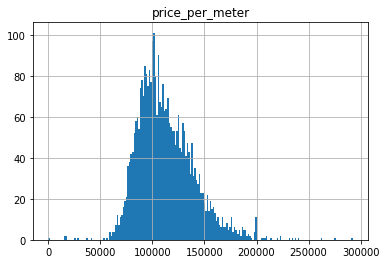

In [51]:
spb_centre.hist('price_per_meter',bins = 200) #цена за метр
spb_centre['price_per_meter'].describe()

В центре медианное значение цены за метр больше на ~19.5%, среднее на ~25%

count    3252.000000
mean        2.122386
std         0.940116
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64

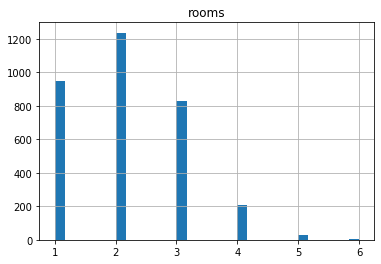

In [52]:
spb_centre.hist('rooms', bins = 30) #число комнат
spb_centre['rooms'].describe()

среднее количество комнат в центре больше на 23% => в центре больше трехкомнатных квартир

count    3248.000000
mean        2.839092
std         0.304179
min         2.500000
25%         2.550000
50%         2.750000
75%         3.000000
max         5.800000
Name: ceiling_height, dtype: float64

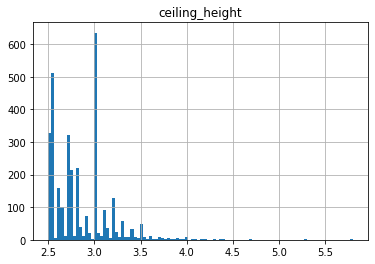

In [53]:
spb_centre.hist('ceiling_height', bins = 100) #высота потолков
spb_centre['ceiling_height'].describe()

В среднем в центре потолки на ~10% выше(3 метра против 2.65-2.7).

In [54]:
print('\nКоэффициенты корреляции общей цены:')
print('\nОтносительно площади:              ',spb_centre['last_price'].corr(spb_centre['total_area']))
print('\nОтносительно числа комнат:         ',spb_centre['last_price'].corr(spb_centre['rooms']))
print('\nОтносительно расстояния до центра:',spb_centre['last_price'].corr(spb_centre['cityCenters_nearest']))


Коэффициенты корреляции общей цены:

Относительно площади:               0.7184592582850537

Относительно числа комнат:          0.4959836144899938

Относительно расстояния до центра: -0.37087938075915106


Text(0, 0.5, 'Расстояния до центра')

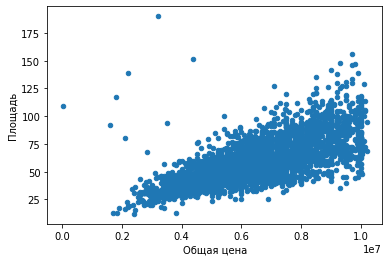

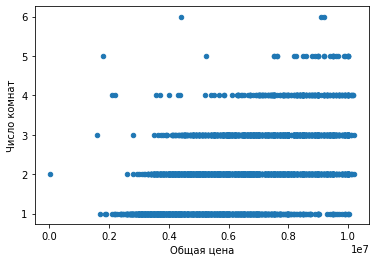

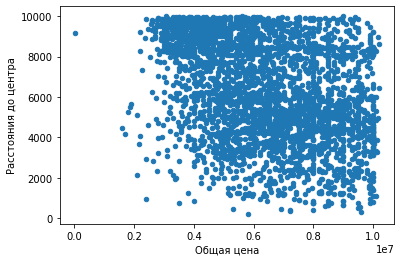

In [55]:
spb_centre.plot(x='last_price', y='total_area', kind='scatter')
plt.xlabel('Общая цена')
plt.ylabel('Площадь')

spb_centre.plot(x='last_price', y='rooms', kind='scatter')
plt.xlabel('Общая цена')
plt.ylabel('Число комнат')

spb_centre.plot(x='last_price', y='cityCenters_nearest', kind='scatter')
plt.xlabel('Общая цена')
plt.ylabel('Расстояния до центра')

В целом значения теже самые(корреляция расстояния до центра на ~10% меньше)

In [56]:
print('\nКоэффициенты корреляции цены за квадрат:')
print('\nОтносительно площади:              ',spb_centre['price_per_meter'].corr(spb_centre['total_area']))
print('\nОтносительно числа комнат:         ',spb_centre['price_per_meter'].corr(spb_centre['rooms']))
print('\nОтносительно расстояния до центра:',spb_centre['price_per_meter'].corr(spb_centre['cityCenters_nearest']))


Коэффициенты корреляции цены за квадрат:

Относительно площади:               -0.45558427976966676

Относительно числа комнат:          -0.504451779406031

Относительно расстояния до центра: -0.08736327349106468


Text(0, 0.5, 'Расстояния до центра')

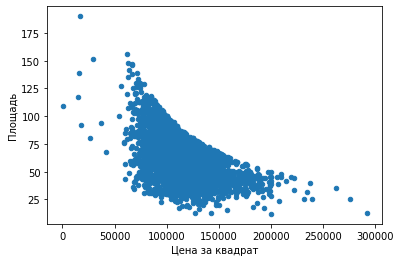

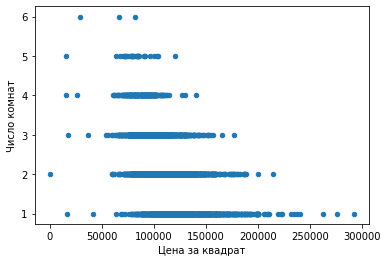

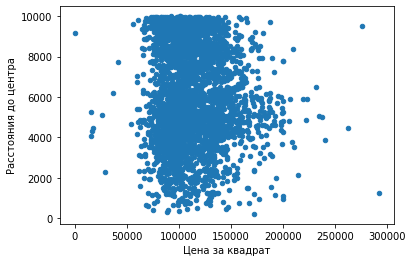

In [57]:
spb_centre.plot(x='price_per_meter', y='total_area', kind='scatter')
plt.xlabel('Цена за квадрат')
plt.ylabel('Площадь')

spb_centre.plot(x='price_per_meter', y='rooms', kind='scatter')
plt.xlabel('Цена за квадрат')
plt.ylabel('Число комнат')

spb_centre.plot(x='price_per_meter', y='cityCenters_nearest', kind='scatter')
plt.xlabel('Цена за квадрат')
plt.ylabel('Расстояния до центра')

Тоже похоже на ситуацию со всем городом, но корреляция относительно площади и расстояния меньше(становяться не сущщественны)

(1, 15000000)

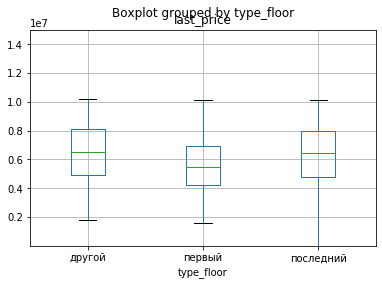

In [58]:
spb_centre.boxplot(column = 'last_price', by = 'type_floor')
plt.ylim(1,15000000)

(1, 300000)

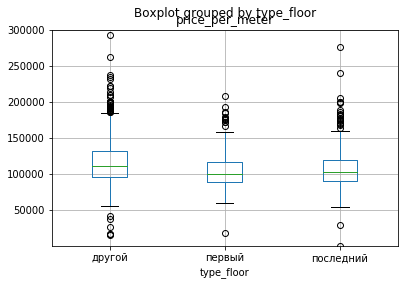

In [59]:
spb_centre.boxplot(column = 'price_per_meter', by = 'type_floor')
plt.ylim(1,300000)

(3200000, 15000000)

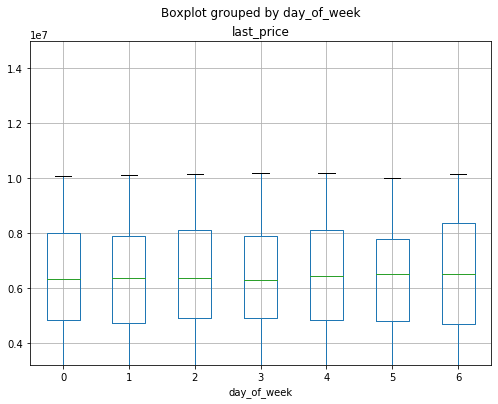

In [60]:
spb_centre.boxplot(column = 'last_price', by = 'day_of_week', figsize=(8, 6))
plt.ylim(3200000,15000000)

(70000, 200000)

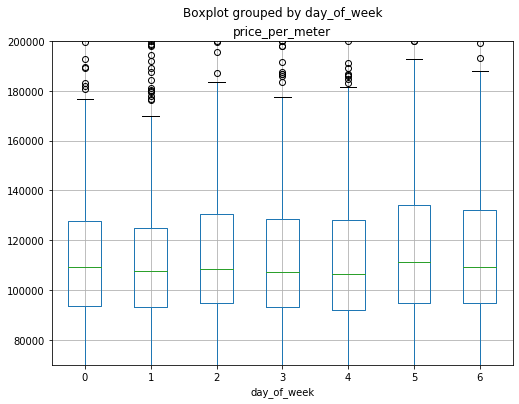

In [61]:
spb_centre.boxplot(column = 'price_per_meter', by = 'day_of_week', figsize=(8, 6))
plt.ylim(70000,200000)

Высокие цены смещаются на среду четверг, минимумы понедельник, пятница-суббота(как будто сменили функцию с синуса на косинус, и период сдвинулся)

(3200000, 15000000)

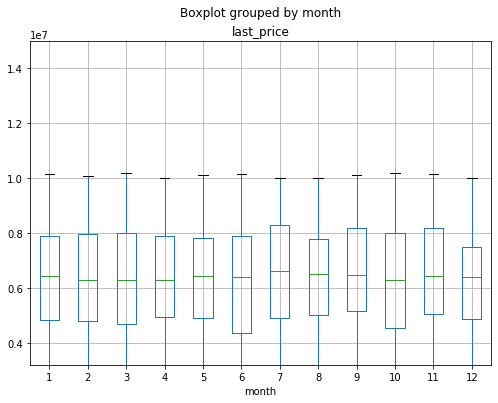

In [62]:
spb_centre.boxplot(column = 'last_price', by = 'month', figsize=(8, 6))
plt.ylim(3200000,15000000)

(70000, 200000)

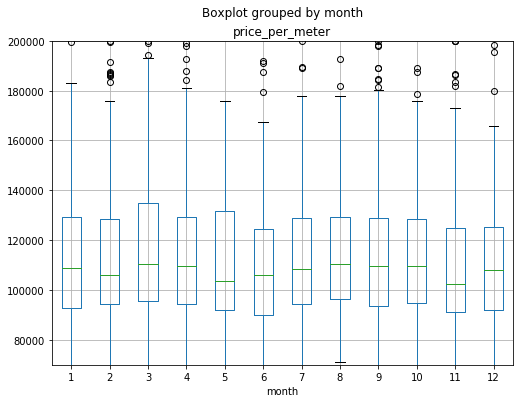

In [63]:
spb_centre.boxplot(column = 'price_per_meter', by = 'month', figsize=(8, 6))
plt.ylim(70000,200000)

(3200000, 28000000)

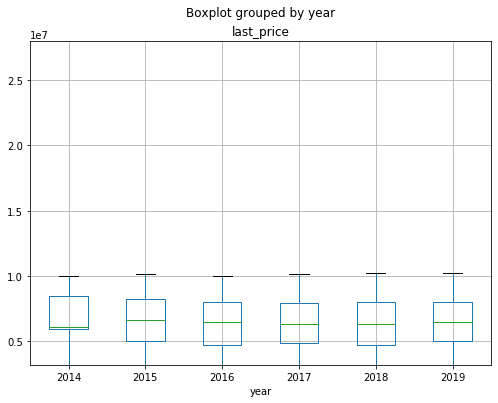

In [64]:
spb_centre.boxplot(column = 'last_price', by = 'year', figsize=(8, 6))
plt.ylim(3200000,28000000)

(70000, 200000)

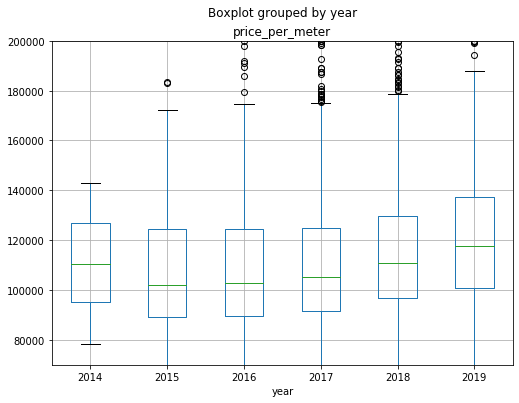

In [65]:
spb_centre.boxplot(column = 'price_per_meter', by = 'year', figsize=(8, 6))
plt.ylim(70000,200000)

Данные центра незначительно отличаются от всего города колличественно(в центре все больше и дороже), но качественно выводы те же самые что и по всему городу (разве что уменьшенно влияние расстояния до центра).

## Общий вывод

Рыночная стоимость объекта определяется в первую очередь по его общей площади, и удаленности от центра(если только объект не находить менее чем в 10км от него, в таком случае данный параметр теряет свое влияние). Так же стоит обратить внимание на сезонность(влияние того в каком месяце было подано объявление о продаже). Также влияет этаж квартиры на первом этаже самы дешевые, на последнем чуть подороже, все что между ними еще дороже. Средняя цена за квадратный метр колеблется от 100 до 130 тысяч за метр.